# Machine Learning

### Survival Prediction: 
The most classic task! Build a model to predict whether a passenger survived (the 'survived' column) based on the other features. This is a binary classification problem.

In [ ]:
# importing libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score, precision_score

# loading dataset
df = sns.load_dataset("titanic")

In [2]:
# quick overview of dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# now we have to drop the columns which are not required 
df.drop(['deck', 'embark_town'], axis=1, inplace=True)

In [4]:
# check for missing values
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [5]:
df['age'] = df['age'].fillna(df['age'].mean())  # for missing values in age column, we will use mean imputation

In [6]:
df.dropna(inplace=True)  # drop rows with missing values
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [7]:
df.info()   # check the data types of each column

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    889 non-null    int64   
 1   pclass      889 non-null    int64   
 2   sex         889 non-null    object  
 3   age         889 non-null    float64 
 4   sibsp       889 non-null    int64   
 5   parch       889 non-null    int64   
 6   fare        889 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       889 non-null    category
 9   who         889 non-null    object  
 10  adult_male  889 non-null    bool    
 11  alive       889 non-null    object  
 12  alone       889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 79.1+ KB


In [8]:
# changing object data types to category and then encode them using labelencoder
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,0,True


In [9]:
# Now split the dataset into features and target variable
X = df.drop('survived', axis = 1)  # features
y = df['survived']  # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# calling the model
model = LogisticRegression()

In [11]:
# train the model
model.fit(X_train, y_train)

d:\ProgramData\miniconda3\envs\autoedaapp_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# predict the values
y_predict = model.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [13]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_predict))
print('Recall Score: ', recall_score(y_test, y_predict))
print('Precision Score: ', precision_score(y_test, y_predict))
print('F1 Score: ', f1_score(y_test, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_predict))
print('Classification Report: \n', classification_report(y_test, y_predict))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[109   0]
 [  0  69]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



Text(70.72222222222221, 0.5, 'Actual')

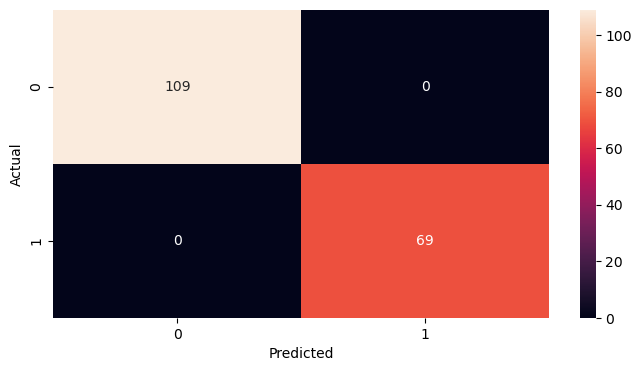

In [17]:
# plot the confusion matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
# you can also save the models
import pickle
pickle.dump(model, open('./model_logistic_regression.pkl', 'wb'))

This is a basics of Data Science. You can explore more models and their uses from <a href="https://scikit-learn.org/">Sickit Learn</a>.